In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../')
import utils
import numpy as np

In [2]:
CALIBRATION_FILE = '../../../calibration/out/C.mat'
DATA_FILE = '../../../experiment_data/blue_feet/4/2016.10.02_20.40.19_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/2  20:40:19
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



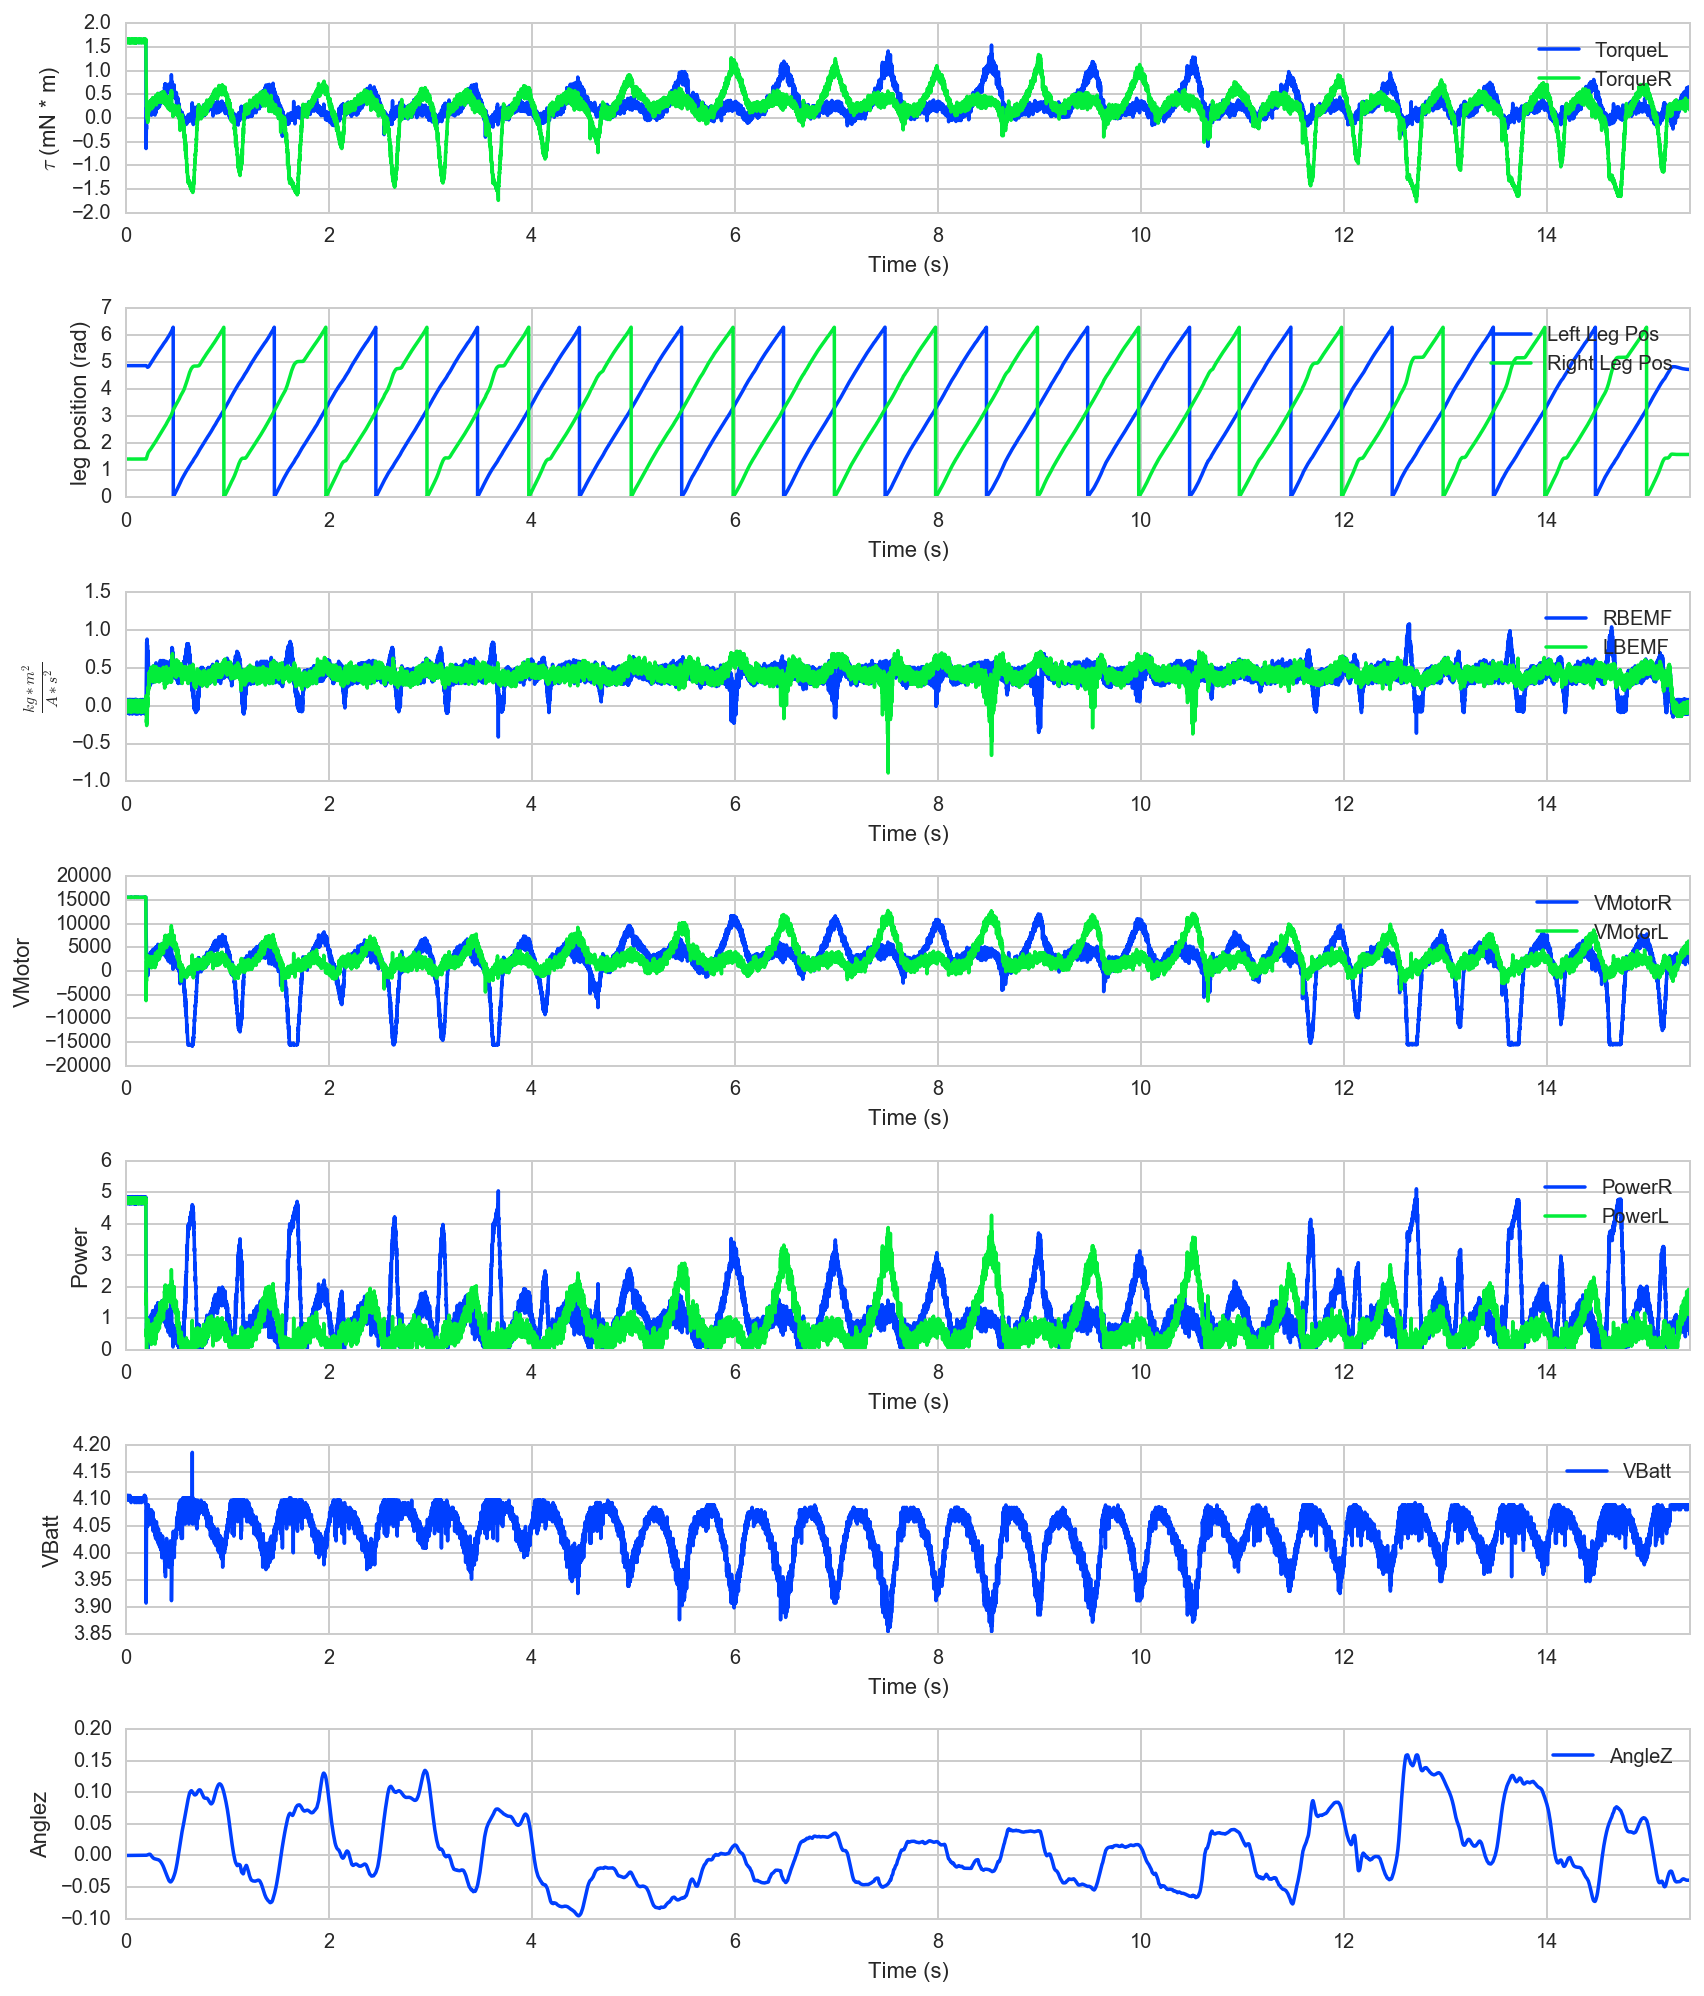

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

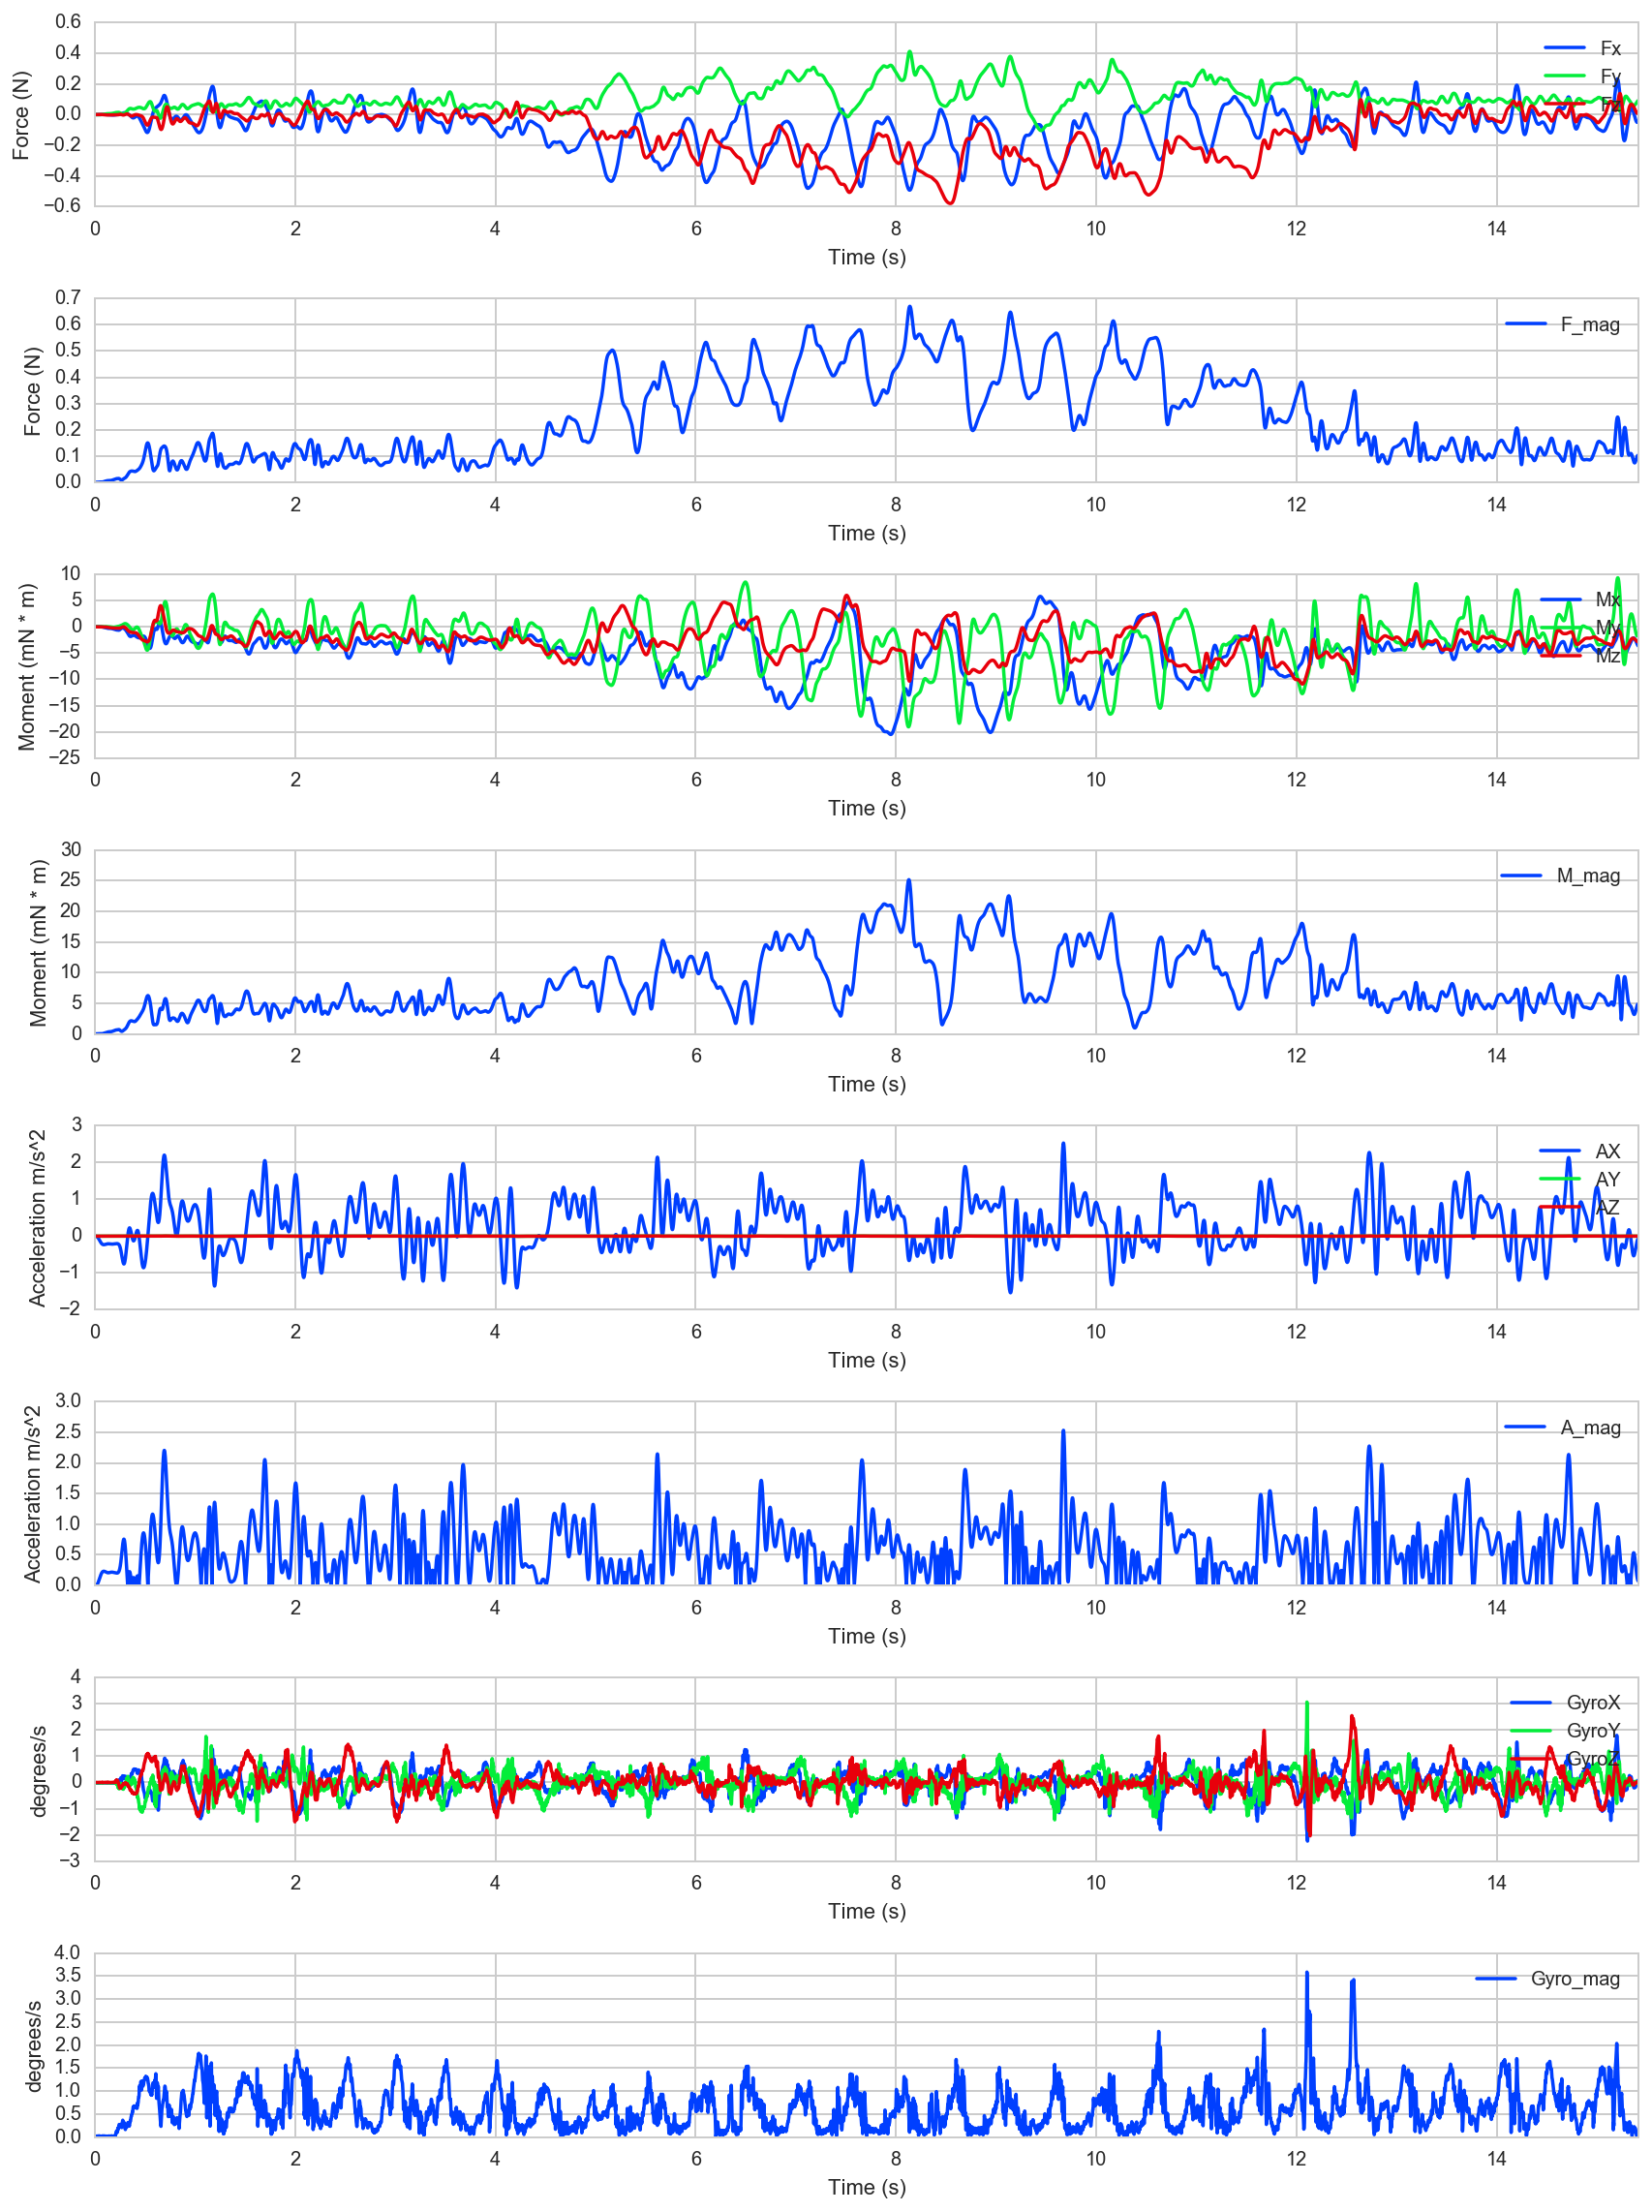

In [5]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag'], display=True, save_figure=False)

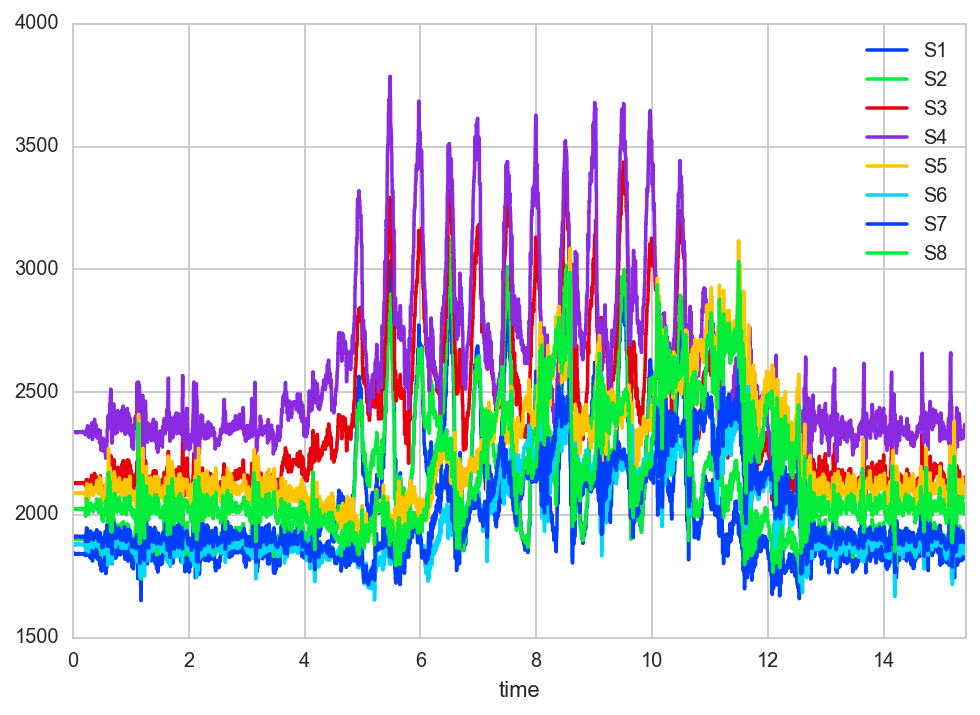

In [6]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [9]:
print "Here is the cost of transport for inside flaps"
cot = utils.cost_of_transport_inside_flaps(df, has_bottom_shell=False, v_avg=5.715/100.,
                                           start_time=7000, end_time=11000, same_power_across_experiments=0)
print cot


Here is the cost of transport for inside flaps
power:1.97132648022
47.9863448539


In [10]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=7000,end_time=11000)
print drag

drag energy (kg*cm^2/s^2): 437.517281399
0.0437517281399


In [11]:
start = df['Right Leg Pos'][6500:7500].argmax()
end = df['Right Leg Pos'][10500:11500].argmax()
print start, end
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

6973 10958
[[ 6973  7973]
 [ 7973  8973]
 [ 8973  9973]
 [ 9973 10973]]


In [13]:
cots = utils.get_cost_of_transport_from_list(df,False,v_avg=5.715/100.,intervals=intervals)
print cots

power:2.02020234537
power:2.01822172638
power:1.99490885363
power:1.9005082037
[49.176088989974701, 49.127876445219961, 48.560390763522506, 46.262475026546682]
